In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

1차 시나리오 자치구 도출 : 공항과의 연계성을 고려한 UAM 입지

In [ ]:
family_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 가구수.xlsx', sheet_name = 'Sheet2').rename(columns = {'구분':'자치구'}).drop(columns = ['기간'])

tour_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 관광호텔.xlsx', sheet_name = 'Sheet2').drop(0).reset_index(drop = True)

business_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 비즈니스 밀집도.xlsx', sheet_name = 'Sheet2').drop(columns = ['종사자수', '평균종사자', '종사자밀도(A)','인구밀도(B)','종사자밀도비(A/B*100)'])

earning_df = pd.read_csv('/content/gdrive/MyDrive/대회/통계데이터 분석대회/국민연금공단_자격 시구신고 평균소득월액_20200531.csv', encoding = 'CP949').rename(columns = {'시군구':'자치구'})

for i in range(len(earning_df)):
  earning_df['자치구'][i] = earning_df['자치구'][i].split('서울특별시')[1]

grdp_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/GRDP.xlsx')

access_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 공항 접근 지수.xlsx', sheet_name = 'Sheet3')

from functools import reduce
dfs = [family_df,tour_df,business_df, earning_df, grdp_df, access_df]
jachigu_data_df = reduce(lambda left, right: pd.merge(left, right, on='자치구'), dfs)
jachigu_data_df

,자치구,일반가구수,평균가구원수,호텔수,객실수,사업체수,사업체밀도,평균소득월액,GRDP,승용차,대중교통
0,종로구,63414,2.1,42,4194,39679,1660,1450383,337810,59.014603,63.222504
1,중구,55093,2.1,102,18367,60127,6037,1451062,538230,59.956229,60.939844
2,용산구,95714,2.2,16,3777,20254,926,1492947,126960,47.877614,54.772355
3,성동구,122186,2.3,7,339,28343,1681,1471625,121680,63.897192,69.746660
4,광진구,152090,2.2,11,1477,24445,1433,1368980,65870,72.925881,78.503356
5,동대문구,150373,2.2,13,1297,31324,2203,1387911,75560,72.146214,76.083505
6,중랑구,164832,2.3,3,177,28228,1526,1307629,47420,78.193674,84.944271
7,성북구,179660,2.3,5,396,23617,961,1386843,61420,64.099276,73.707725
8,강북구,129805,2.2,5,372,19014,806,1298784,32840,69.645495,78.346362
9,도봉구,127362,2.4,3,156,18628,902,1342237,34050,68.278663,83.600197


In [ ]:
from sklearn.preprocessing import MinMaxScaler


train_df_temp = jachigu_data_df.drop(columns =['자치구']).copy()
scaler = MinMaxScaler()  ## 표준화 객체 생성
scaler.fit(train_df_temp)

train_df_array = scaler.transform(train_df_temp)

train_df = pd.DataFrame(train_df_array) 

columns = jachigu_data_df.columns.tolist()
del columns[0]

train_df.columns = columns
train_df.index = jachigu_data_df['자치구'].copy()
jachigu_scaled_df = train_df.copy()
jachigu_scaled_df

,일반가구수,평균가구원수,호텔수,객실수,사업체수,사업체밀도,평균소득월액,GRDP,승용차,대중교통
자치구,,,,,,,,,,
종로구,0.041465,0.285714,0.405941,0.226238,0.401744,0.171964,0.408329,0.458920,0.626547,0.537877
중구,0.000000,0.285714,1.000000,1.000000,0.791981,1.000000,0.410158,0.743757,0.642337,0.494917
용산구,0.202424,0.428571,0.148515,0.203472,0.031031,0.033106,0.522974,0.159260,0.439798,0.378845
성동구,0.334340,0.571429,0.059406,0.015778,0.185404,0.175936,0.465544,0.151756,0.708420,0.660661
광진구,0.483358,0.428571,0.099010,0.077906,0.111014,0.129020,0.189071,0.072439,0.859817,0.825462
동대문구,0.474802,0.428571,0.118812,0.068079,0.242295,0.274688,0.240062,0.086210,0.846743,0.779920
중랑구,0.546855,0.571429,0.019802,0.006933,0.183210,0.146614,0.023824,0.046217,0.948150,0.946680
성북구,0.620746,0.571429,0.039604,0.018890,0.095212,0.039728,0.237185,0.066114,0.711809,0.735208
강북구,0.372307,0.428571,0.039604,0.017579,0.007367,0.010405,0.000000,0.025496,0.804810,0.822507


In [ ]:
# 일반가구수	평균가구원수	호텔수	객실수	사업체수	사업체밀도	평균소득월액	GRDP	승용차	대중교통

temp_df = jachigu_scaled_df.copy().drop(columns = ['평균가구원수', '사업체밀도', '객실수'])

print(temp_df.columns)

from sklearn.decomposition import PCA

pca = PCA()   ## PC 성분을 뽑아보기
pca.fit(temp_df)
pc_transform = pca.transform(temp_df)

pca.components_

Index(['일반가구수', '호텔수', '사업체수', '평균소득월액', 'GRDP', '승용차', '대중교통'], dtype='object')


array([[-0.06717944,  0.45196243,  0.52915699,  0.43792489,  0.54190455,
        -0.06508247, -0.14674905],
       [ 0.02195763, -0.0268338 , -0.08844795, -0.07635512, -0.10049139,
        -0.69334862, -0.70307456],
       [-0.95127244,  0.20587695, -0.16881228, -0.15153646, -0.00577192,
         0.02514891, -0.02384868],
       [-0.19055145, -0.47714266, -0.24498826,  0.8197935 , -0.05506198,
        -0.02852172, -0.00995411],
       [-0.23036283, -0.55559765,  0.72690144, -0.17268923, -0.11693126,
        -0.20316705,  0.15838933],
       [-0.0046746 ,  0.30083703,  0.30676441,  0.22181029, -0.76730019,
         0.31705406, -0.27730517],
       [ 0.02620669,  0.35463758, -0.03410138,  0.16836157, -0.30125289,
        -0.60974247,  0.61765499]])

In [ ]:
ratio = pca.explained_variance_ratio_
ratio   

array([0.43522086, 0.32506686, 0.14990423, 0.06803462, 0.01156001,
       0.00709938, 0.00311405])

In [ ]:
import numpy as np
import plotly.express as px

a=np.array([0.43522086, 0.32506686, 0.14990423, 0.06803462, 0.01156001,0.00709938, 0.00311405])


exp_var_cumul = np.cumsum(a)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    width=700, height=500,
    labels={"x": "# PC", "y": "설명 가능한 분산"}
)

['일반가구수', '호텔수', '사업체수', '평균소득월액', 'GRDP', '승용차', '대중교통'] 의 지표로 했을때, PC성분과 분산비중이 높음

PC 1 : 관광/ 비즈니스 / GRDP 등의 규모가 큰 도시

PC 2 : 교통을 통한 공항으로의 이동 시간이 짧은 정도 (값이 클수록, 이동시간이 적게 걸림)

PC 3 : 가구수 및 가구인이 많은 정도

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:3], columns=['PC1', 'PC2', 'PC3'], index = jachigu_scaled_df.index) 
PCA_jachigu_df

,PC1,PC2,PC3
자치구,,,
종로구,0.409683,-0.010295,0.465158
중구,1.319963,-0.056000,0.688861
용산구,0.011438,0.260070,0.239355
성동구,-0.114441,-0.142803,0.046112
광진구,-0.288997,-0.315587,0.186924
동대문구,-0.188283,-0.289771,0.149585
중랑구,-0.419828,-0.466026,0.090245
성북구,-0.330882,-0.166599,-0.041545
강북구,-0.470153,-0.247323,0.312352


In [ ]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model3 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model3.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model3.fit_predict(PCA_jachigu_df)

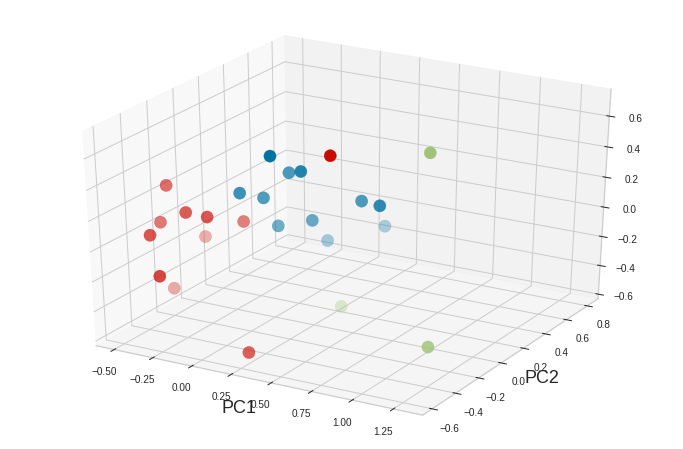

In [ ]:
import matplotlib.pyplot as plt



TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC3'], s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC3'], s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC3'], s = 150, color = 'g' )



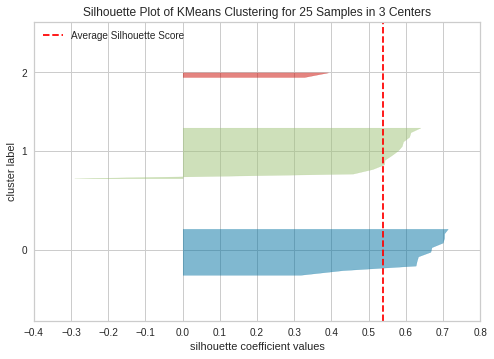

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# https://studying-haeung.tistory.com/13

visualizer_3 = SilhouetteVisualizer(model3, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(PCA_jachigu_df)      
visualizer_3.show()

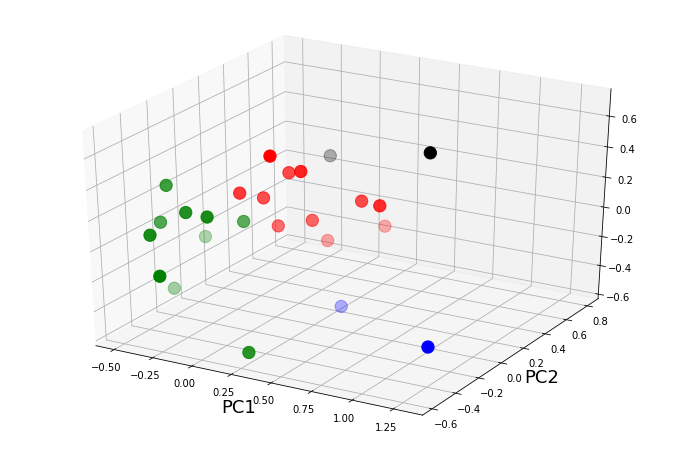

In [ ]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model4 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model4.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model4.fit_predict(PCA_jachigu_df)

import matplotlib.pyplot as plt

# # matplotlib 한글지원
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC3'], s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC3'], s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC3'], s = 150, color = 'g' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC3'], s = 150, color = 'black' )
# for i in TP_MDS_df.index:

#   ax.text(TP_MDS_df['PC1'][i], TP_MDS_df['PC2'][i], TP_MDS_df['PC3'][i], s = i, fontdict= { 'size' : 16} )

# plt.show()

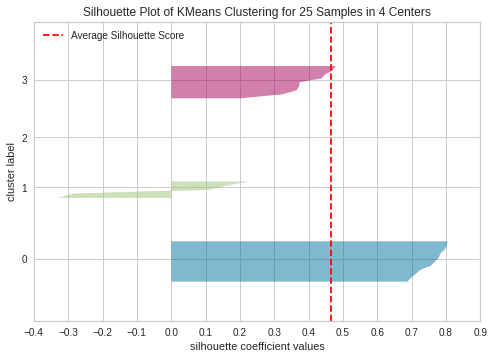

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# https://studying-haeung.tistory.com/13

visualizer_4 = SilhouetteVisualizer(model4, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_4.fit(PCA_jachigu_df)      
visualizer_4.show()

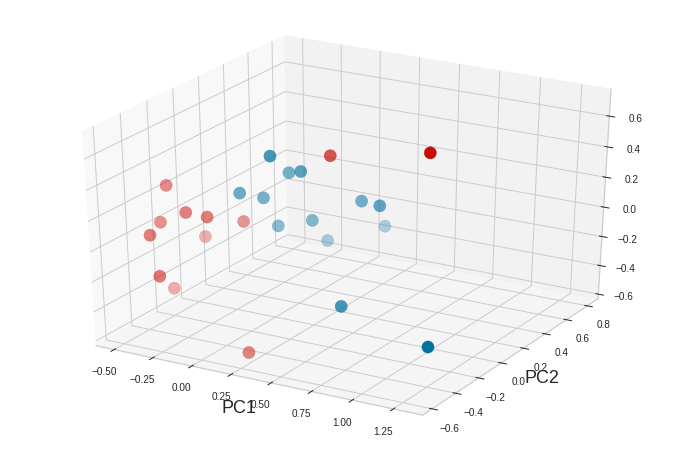

In [ ]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model2 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model2.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model2.fit_predict(PCA_jachigu_df)

import matplotlib.pyplot as plt

# # matplotlib 한글지원
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC3'], s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC3'], s = 150, color = 'b' )

# for i in TP_MDS_df.index:

#   ax.text(TP_MDS_df['PC1'][i], TP_MDS_df['PC2'][i], TP_MDS_df['PC3'][i], s = i, fontdict= { 'size' : 16} )

# plt.show()

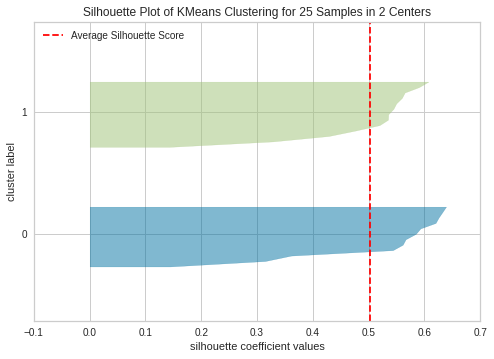

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# https://studying-haeung.tistory.com/13

visualizer_2 = SilhouetteVisualizer(model2, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(PCA_jachigu_df)      
visualizer_2.show()

In [ ]:
# !pip install pyclustering
from pyclustering.cluster import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette

kmedoids_ins = kmedoids.kmedoids(PCA_jachigu_df.values,initial_index_medoids=[24,0,23]) # initial_index는 df행 중 대푯값 행 지정
kmedoids_ins.process()
clusters = kmedoids_ins.get_clusters()
score = silhouette(PCA_jachigu_df.values, clusters).process().get_score()
print("평균 실루엣값 : ",sum(score)/len(score))
# medoids = kmeans_plusplus_initializer(PCA_jachigu_df, 4).initialize(return_index=True)
# kmedoids_instance = kmedoids(PCA_jachigu_df, medoids)
# clusters = kmedoids_instance.process().get_clusters()
print('###########################################')
print('[K-대푯값 군집 분석 결과]')

print(clusters)


평균 실루엣값 :  0.7729837761331858
###########################################
[K-대푯값 군집 분석 결과]
[[0, 3, 4, 5, 6, 7, 8, 9, 10, 17, 23, 24], [1, 22], [2, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21]]


In [ ]:
for i in range(len(clusters)):
  PCA_jachigu_df.loc[PCA_jachigu_df.reset_index().index.isin(clusters[i]), 'cluster'] = i

In [ ]:
PCA_jachigu_df

,PC1,PC2,PC3,cluster
자치구,,,,
종로구,0.409683,-0.010295,0.465158,0.0
중구,1.319963,-0.056000,0.688861,1.0
용산구,0.011438,0.260070,0.239355,2.0
성동구,-0.114441,-0.142803,0.046112,0.0
광진구,-0.288997,-0.315587,0.186924,0.0
동대문구,-0.188283,-0.289771,0.149585,0.0
중랑구,-0.419828,-0.466026,0.090245,0.0
성북구,-0.330882,-0.166599,-0.041545,0.0
강북구,-0.470153,-0.247323,0.312352,0.0


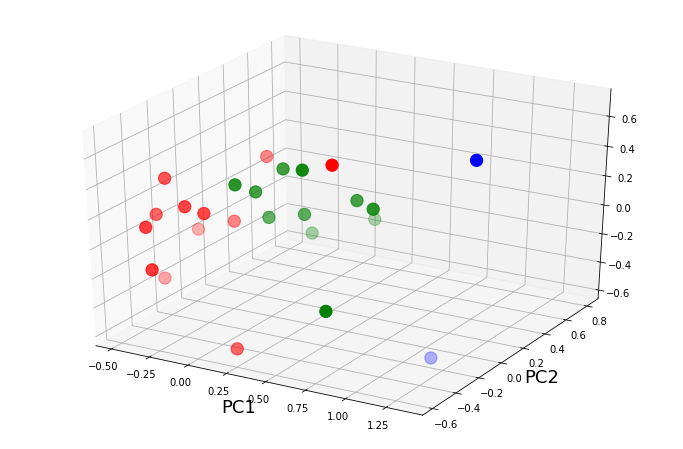

In [ ]:

import matplotlib.pyplot as plt

# # matplotlib 한글지원
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC3'], s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC3'], s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC3'], s = 150, color = 'g' )

실루엣 값도 준수하고, PC1이 높으면서 PC2는 낮은 군집이 형성되었다. 
PC3가 높지 않은 요소도 있지만, 그 분산 비중이 상대적으로 작으므로 감안할수 있을 것이다.

도출된 자치구는 '강남구', '중구'이다.





In [ ]:
## 강남구와 중구에 속한 후보지 확인

nomination_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/입지후보군.xlsx', index_col = 0)
nomination_df = nomination_df.loc[nomination_df['jachigu'].isin(['강남구', '중구'])].reset_index(drop = True)
nomination_df 

,addr,type,x,y,area,dong,jachigu
0,서울특별시 강남구 일원동 50 삼성서울병원,헬기장,127.085151,37.488298,12980.0,일원동,강남구
1,인천광역시 중구 운서동 2844-1,헬기장,126.481868,37.461586,5096.8,운서동,중구
2,서울특별시 강남구 일원동 580-1,국유지,127.079598,37.497171,22436.0,일원동,강남구
3,서울특별시 강남구 일원동 산63-32,국유지,127.082220,37.477423,26594.0,일원동,강남구
4,서울특별시 강남구 일원동 466,국유지,127.085909,37.498785,11491.0,일원동,강남구
5,서울특별시 중구 남대문로5가 467,국유지,126.979310,37.554088,21015.6,남대문로5가,중구
6,서울특별시 중구 장충동2가 197,국유지,127.004072,37.557683,14867.2,장충동2가,중구
7,서울특별시 중구 장충동2가 산7-22 남산2호터널 시점부 관리사무소,국유지,127.001403,37.555364,64014.0,장충동2가,중구
8,서울특별시 중구 장충동2가 197,국유지,127.004072,37.557683,14867.2,장충동2가,중구
9,서울특별시 중구 장충동2가 산7-22 남산2호터널 시점부 관리사무소,국유지,127.001403,37.555364,64014.0,장충동2가,중구


In [ ]:
## 면적 8000 이하 제거한 후보지 확인

nomination_df = nomination_df = nomination_df.loc[nomination_df['area'] >= 8000].reset_index(drop = True)
nomination_df

,addr,type,x,y,area,dong,jachigu
0,서울특별시 강남구 일원동 50 삼성서울병원,헬기장,127.085151,37.488298,12980.0,일원동,강남구
1,서울특별시 강남구 일원동 580-1,국유지,127.079598,37.497171,22436.0,일원동,강남구
2,서울특별시 강남구 일원동 산63-32,국유지,127.082220,37.477423,26594.0,일원동,강남구
3,서울특별시 강남구 일원동 466,국유지,127.085909,37.498785,11491.0,일원동,강남구
4,서울특별시 중구 남대문로5가 467,국유지,126.979310,37.554088,21015.6,남대문로5가,중구
5,서울특별시 중구 장충동2가 197,국유지,127.004072,37.557683,14867.2,장충동2가,중구
6,서울특별시 중구 장충동2가 산7-22 남산2호터널 시점부 관리사무소,국유지,127.001403,37.555364,64014.0,장충동2가,중구
7,서울특별시 중구 장충동2가 197,국유지,127.004072,37.557683,14867.2,장충동2가,중구
8,서울특별시 중구 장충동2가 산7-22 남산2호터널 시점부 관리사무소,국유지,127.001403,37.555364,64014.0,장충동2가,중구
9,서울특별시 중구 예장동 산5-85 서울시청 남산별관,공원,126.990377,37.550140,2896887.0,예장동,중구


2차 시나리오 자치구 도출 : 항공 택시 및 출퇴근용도로서의 UAM

In [ ]:
import numpy as np
import pandas as pd

jachigu_od_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 OD 통행량.xlsx', index_col = 0)
jachigu_od_df = jachigu_od_df.drop(jachigu_od_df.loc[jachigu_od_df['출발_구']==jachigu_od_df['도착_구']].index, axis = 'index').reset_index(drop= True) 

family_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 가구수.xlsx', sheet_name = 'Sheet2').rename(columns = {'구분':'자치구'}).drop(columns = ['기간'])

tour_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 관광호텔.xlsx', sheet_name = 'Sheet2').drop(0).reset_index(drop = True)

business_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 비즈니스 밀집도.xlsx', sheet_name = 'Sheet2').drop(columns = ['종사자수', '평균종사자', '종사자밀도(A)','인구밀도(B)','종사자밀도비(A/B*100)'])

grdp_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/GRDP.xlsx')

earning_df = pd.read_csv('/content/gdrive/MyDrive/대회/통계데이터 분석대회/국민연금공단_자격 시구신고 평균소득월액_20200531.csv', encoding = 'CP949').rename(columns = {'시군구':'자치구'})

for i in range(len(earning_df)):
  earning_df['자치구'][i] = earning_df['자치구'][i].split('서울특별시')[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
id_rule = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/버스정류장노선_자치구별 앞번호.xlsx')
bus_meta = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울시버스정류소좌표데이터(2022.04.15).xlsx').drop(columns = ['X좌표','Y좌표'])

In [ ]:

id_rule['버스정류장수'] = None

for i in range(1,26):
  count = 0 
  for j in range(len(bus_meta)):
    if (int(bus_meta['ARS-ID'][j]) > i*1000) & (int(bus_meta['ARS-ID'][j]) < (i+1)*1000):
      count= count + 1
  id_rule['버스정류장수'][i-1] = count

bus_station_cnt_df = id_rule.drop(columns = ['번호'])


subway_cnt_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/자치구별 지하철역개수.xlsx')
subway_cnt_df

area_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 면적.xlsx' ,sheet_name='Sheet2') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
transport_cnt_df= pd.DataFrame()
transport_cnt_df['정류장 및 역 개수'] = bus_station_cnt_df['버스정류장수']*43 +subway_cnt_df['지하철역개수']*52   ## 주중 연평균 버스/지하철 이용건수 438만 : 525만
transport_cnt_df['자치구']=subway_cnt_df['자치구'].copy()
transport_cnt_df

,정류장 및 역 개수,자치구
0,18211,종로구
1,10851,중구
2,15812,용산구
3,20578,성동구
4,12852,광진구
5,14194,동대문구
6,17231,중랑구
7,26777,성북구
8,18632,강북구
9,16480,도봉구


In [ ]:
mountain_area = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/서울 자치구별 산림면적.xlsx')

area_df['주거면적'] = (area_df['면적'].astype(float)*1000000) - (mountain_area['합계'].astype(float)*10000)  ## km^2 단위와, ha 단위(1ha = 10000m^2) 통합

area_df =  area_df.drop(columns = ['면적'])
area_df

,자치구,주거면적
0,종로구,14350000.0
1,중구,8460000.0
2,용산구,20070000.0
3,성동구,16310000.0
4,광진구,14110000.0
5,동대문구,13020000.0
6,중랑구,13180000.0
7,성북구,15220000.0
8,강북구,10700000.0
9,도봉구,10700000.0


In [ ]:
transport_ratio_df = pd.DataFrame()
transport_ratio_df['면적대비 교통접근지수'] = transport_cnt_df['정류장 및 역 개수'] / (area_df['주거면적']/10000)
transport_ratio_df['자치구']= area_df['자치구'].copy()
transport_ratio_df

,면적대비 교통접근지수,자치구
0,12.690592,종로구
1,12.826241,중구
2,7.878426,용산구
3,12.6168,성동구
4,9.108434,광진구
5,10.90169,동대문구
6,13.073596,중랑구
7,17.593298,성북구
8,17.413084,강북구
9,15.401869,도봉구


In [ ]:
velocity_df = pd.read_excel('/content/gdrive/MyDrive/대회/통계데이터 분석대회/자치구별_통행속도.xlsx').rename(columns={'자치구명':'자치구', '연간평균':'통행속도'})
velocity_df 

,자치구,통행속도
0,종로구,22.67
1,중구,20.88
2,용산구,26.32
3,성동구,23.92
4,광진구,24.07
5,동대문구,22.73
6,중랑구,22.16
7,성북구,23.55
8,강북구,20.61
9,도봉구,21.28


In [ ]:
jachigu_od_df = jachigu_od_df.drop(columns = ['도착_구']).groupby(['출발_구'], as_index=False ).sum().rename(columns = {'총_승객수':'자치구 간 통행량','출발_구':'자치구' })

from functools import reduce
dfs = [family_df,tour_df,business_df, earning_df, grdp_df, jachigu_od_df, area_df, transport_cnt_df, subway_cnt_df, bus_station_cnt_df, transport_ratio_df, velocity_df ]
jachigu_data_df = reduce(lambda left, right: pd.merge(left, right, on='자치구'), dfs)
jachigu_data_df

,자치구,일반가구수,평균가구원수,호텔수,객실수,사업체수,사업체밀도,평균소득월액,GRDP,자치구 간 통행량,주거면적,정류장 및 역 개수,지하철역개수,버스정류장수,면적대비 교통접근지수,통행속도
0,종로구,63414,2.1,42,4194,39679,1660,1450383,337810,42179257,14350000.0,18211,12,409,12.690592,22.67
1,중구,55093,2.1,102,18367,60127,6037,1451062,538230,49470978,8460000.0,10851,16,233,12.826241,20.88
2,용산구,95714,2.2,16,3777,20254,926,1492947,126960,21704401,20070000.0,15812,13,352,7.878426,26.32
3,성동구,122186,2.3,7,339,28343,1681,1471625,121680,26997603,16310000.0,20578,17,458,12.6168,23.92
4,광진구,152090,2.2,11,1477,24445,1433,1368980,65870,28356105,14110000.0,12852,9,288,9.108434,24.07
5,동대문구,150373,2.2,13,1297,31324,2203,1387911,75560,22553728,13020000.0,14194,10,318,10.90169,22.73
6,중랑구,164832,2.3,3,177,28228,1526,1307629,47420,17386544,13180000.0,17231,13,385,13.073596,22.16
7,성북구,179660,2.3,5,396,23617,961,1386843,61420,25507537,15220000.0,26777,13,607,17.593298,23.55
8,강북구,129805,2.2,5,372,19014,806,1298784,32840,18435331,10700000.0,18632,11,420,17.413084,20.61
9,도봉구,127362,2.4,3,156,18628,902,1342237,34050,15707144,10700000.0,16480,6,376,15.401869,21.28


In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_df_temp = jachigu_data_df.drop(columns =['자치구']).copy()
scaler = MinMaxScaler() 
scaler.fit(train_df_temp)

train_df_array = scaler.transform(train_df_temp)

train_df = pd.DataFrame(train_df_array) 

columns = jachigu_data_df.columns.tolist()
del columns[0]

train_df.columns = columns
train_df.index = jachigu_data_df['자치구'].copy()
jachigu_scaled_df = train_df.copy()
jachigu_scaled_df

,일반가구수,평균가구원수,호텔수,객실수,사업체수,사업체밀도,평균소득월액,GRDP,자치구 간 통행량,주거면적,정류장 및 역 개수,지하철역개수,버스정류장수,면적대비 교통접근지수,통행속도
자치구,,,,,,,,,,,,,,,
종로구,0.041465,0.285714,0.405941,0.226238,0.401744,0.171964,0.408329,0.458920,0.556237,0.202475,0.395444,0.444444,0.411215,0.555022,0.309774
중구,0.000000,0.285714,1.000000,1.000000,0.791981,1.000000,0.410158,0.743757,0.697247,0.000000,0.000000,0.666667,0.000000,0.567334,0.040602
용산구,0.202424,0.428571,0.148515,0.203472,0.031031,0.033106,0.522974,0.159260,0.160285,0.399106,0.266548,0.500000,0.278037,0.118261,0.858647
성동구,0.334340,0.571429,0.059406,0.015778,0.185404,0.175936,0.465544,0.151756,0.262647,0.269852,0.522620,0.722222,0.525701,0.548324,0.497744
광진구,0.483358,0.428571,0.099010,0.077906,0.111014,0.129020,0.189071,0.072439,0.288919,0.194225,0.107511,0.277778,0.128505,0.229899,0.520301
동대문구,0.474802,0.428571,0.118812,0.068079,0.242295,0.274688,0.240062,0.086210,0.176710,0.156755,0.179615,0.333333,0.198598,0.392658,0.318797
중랑구,0.546855,0.571429,0.019802,0.006933,0.183210,0.146614,0.023824,0.046217,0.076785,0.162255,0.342790,0.500000,0.355140,0.589784,0.233083
성북구,0.620746,0.571429,0.039604,0.018890,0.095212,0.039728,0.237185,0.066114,0.233832,0.232382,0.855685,0.500000,0.873832,1.000000,0.442105
강북구,0.372307,0.428571,0.039604,0.017579,0.007367,0.010405,0.000000,0.025496,0.097067,0.077002,0.418064,0.388889,0.436916,0.983643,0.000000


In [ ]:
# 일반가구수	평균가구원수	호텔수	객실수	사업체수	사업체밀도	평균소득월액	GRDP	자치구 간 통행량	주거면적	정류장 및 역 개수	지하철역개수	버스정류장수	면적대비 교통접근지수

temp_df = jachigu_scaled_df.copy().drop(columns = [ '사업체밀도', '평균가구원수', '일반가구수', '객실수', '호텔수','지하철역개수', '버스정류장수' ,'주거면적', '정류장 및 역 개수', '통행속도' ])

print(temp_df.columns)

from sklearn.decomposition import PCA

pca = PCA()   ## PC 성분을 100개로 뽑아보기
pca.fit(temp_df)
pc_transform = pca.transform(temp_df)

pca.components_

## PC 1 : 생산성 지수와 소득, 통행량이 많은 성분 
## PC 2 : 버스, 지하철 등의 접근성이 낮은 성분 (값이 클수록, 접근성이 낮음, 주변에 역이 없음)

## PC 1은 높고, PC2는 낮은 군집을 찾아야 한다.

Index(['사업체수', '평균소득월액', 'GRDP', '자치구 간 통행량', '면적대비 교통접근지수'], dtype='object')


array([[ 0.45571415,  0.43062157,  0.45548927,  0.42791834, -0.46508611],
       [-0.22971227, -0.02117998, -0.30481959, -0.34240886, -0.85826853],
       [-0.51074683,  0.82056024, -0.19007534,  0.08400874,  0.15044093],
       [ 0.39620324,  0.34748449,  0.18871101, -0.8160576 ,  0.1439294 ],
       [ 0.56720151,  0.14160472, -0.79238505,  0.16320109,  0.06100731]])

In [ ]:
ratio = pca.explained_variance_ratio_
ratio   

array([0.7158991 , 0.19212613, 0.06009995, 0.01994797, 0.01192685])

In [ ]:
import numpy as np
import plotly.express as px

a=np.array([0.7158991 , 0.19212613, 0.06009995, 0.01994797, 0.01192685])


exp_var_cumul = np.cumsum(a)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    width=700, height=500,
    labels={"x": "# PC", "y": "설명 가능한 분산"}
)

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 
PCA_jachigu_df

,PC1,PC2
자치구,,
종로구,0.285328,0.245712
중구,0.617798,0.675276
용산구,0.122171,-0.668270
성동구,-0.028715,-0.118119
광진구,-0.055343,-0.303330
동대문구,-0.110936,-0.065555
중랑구,-0.392213,0.072702
성북구,-0.436004,0.126079
강북구,-0.688171,0.384984


군집화 실행 [K-MEANS , K대표값, GMM] 순서

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

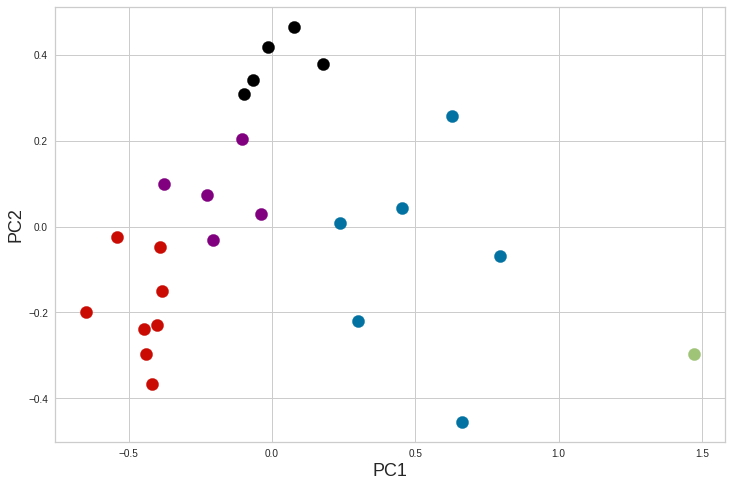

In [ ]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model5 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model5.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model5.fit_predict(PCA_jachigu_df)

import matplotlib.pyplot as plt


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==4,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==4,  'PC2'],  s = 150, color = 'purple' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


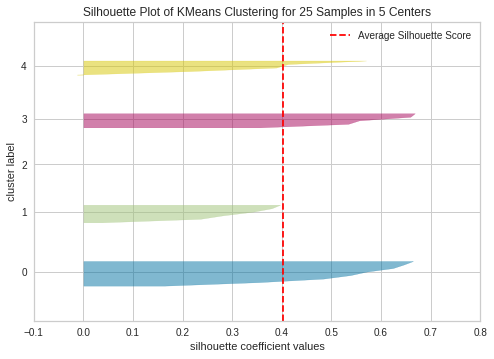

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer_3 = SilhouetteVisualizer(model5, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(PCA_jachigu_df.drop(columns = ['cluster']))      
visualizer_3.show()

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

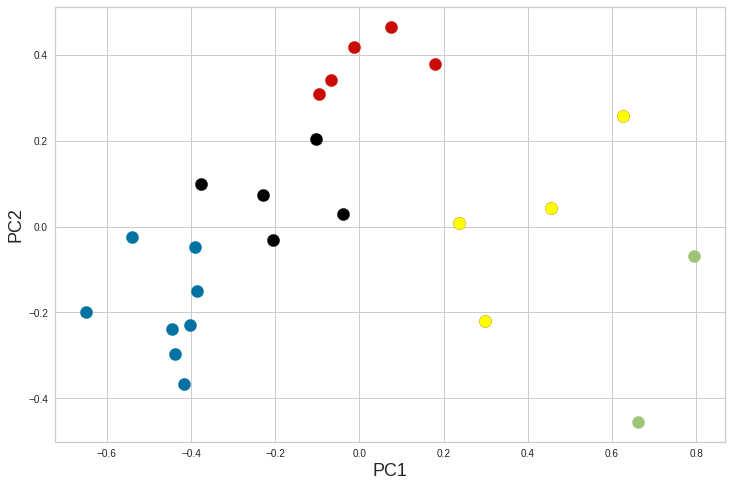

In [ ]:
from sklearn.cluster import KMeans

k = 6

# 그룹 수, random_state 설정
model6 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model6.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model6.fit_predict(PCA_jachigu_df)

import matplotlib.pyplot as plt



TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==4,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==4,  'PC2'],  s = 150, color = 'purple' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==4,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==4,  'PC2'],  s = 150, color = 'yellow' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


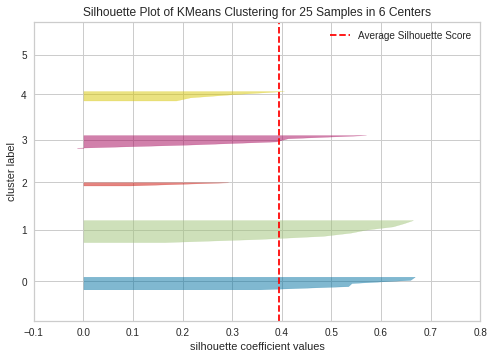

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer_3 = SilhouetteVisualizer(model6, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(PCA_jachigu_df.drop(columns = ['cluster']))      
visualizer_3.show()

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

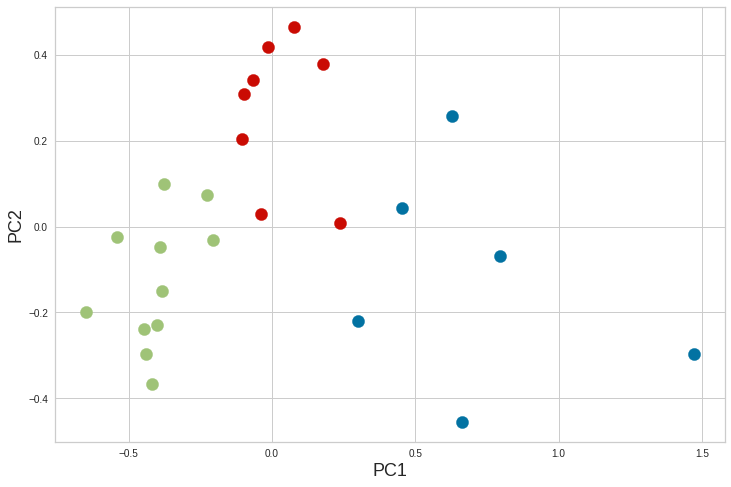

In [ ]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model3 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model3.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model3.fit_predict(PCA_jachigu_df)

import matplotlib.pyplot as plt



TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
# ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


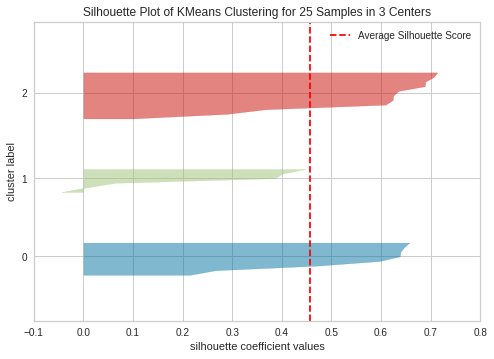

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer_3 = SilhouetteVisualizer(model3, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(PCA_jachigu_df.drop(columns = ['cluster']))      
visualizer_3.show()

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

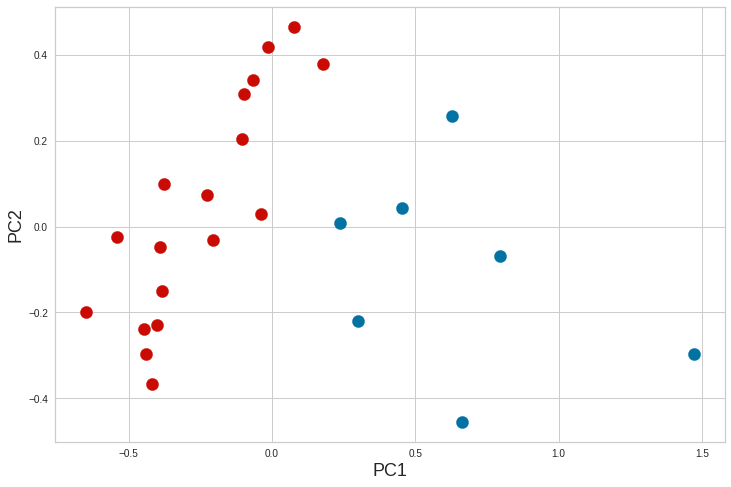

In [ ]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model2 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model2.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model2.fit_predict(PCA_jachigu_df)

import matplotlib.pyplot as plt



TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


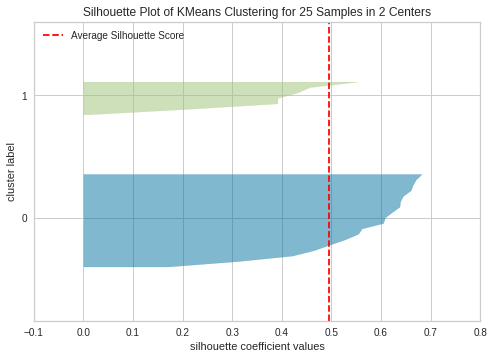

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(model2, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(PCA_jachigu_df.drop(columns = ['cluster']))      
visualizer_2.show()

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

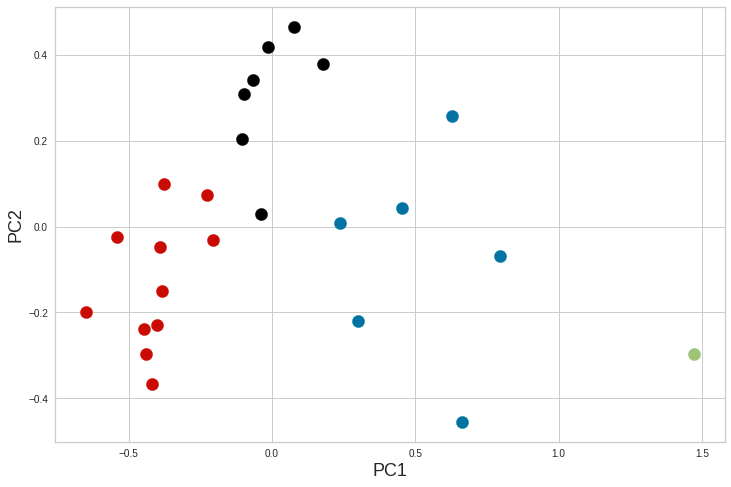

In [ ]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model4 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model4.fit(PCA_jachigu_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
PCA_jachigu_df['cluster'] = model4.fit_predict(PCA_jachigu_df)

import matplotlib.pyplot as plt


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


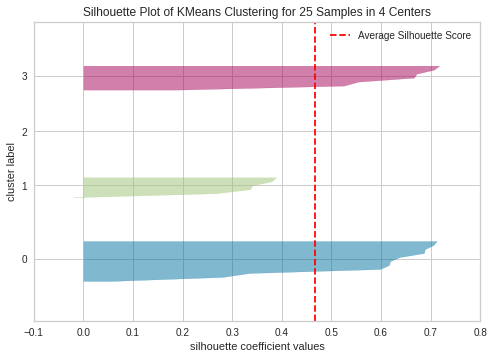

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# https://studying-haeung.tistory.com/13

visualizer_4 = SilhouetteVisualizer(model4, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_4.fit(PCA_jachigu_df.drop(columns = ['cluster']))      
visualizer_4.show()

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

In [ ]:
# !pip install pyclustering
from pyclustering.cluster import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch

kmedoids_ins = kmedoids.kmedoids(PCA_jachigu_df.values,initial_index_medoids=[24,0,12]) # initial_index는 df행 중 대푯값 행 지정
kmedoids_ins.process()
clusters = kmedoids_ins.get_clusters()
score = silhouette(PCA_jachigu_df.values, clusters).process().get_score()
print("평균 실루엣값 : ",sum(score)/len(score))
# medoids = kmeans_plusplus_initializer(PCA_jachigu_df, 4).initialize(return_index=True)
# kmedoids_instance = kmedoids(PCA_jachigu_df, medoids)
# clusters = kmedoids_instance.process().get_clusters()
print('###########################################')
print('[K-대푯값 군집 분석 결과]')

print(clusters)


평균 실루엣값 :  0.6129055811649939
###########################################
[K-대푯값 군집 분석 결과]
[[2, 3, 4, 5, 10, 13, 14, 15, 24], [0, 1, 18, 21, 22, 23], [6, 7, 8, 9, 11, 12, 16, 17, 19, 20]]


In [ ]:
for i in range(len(clusters)):
  PCA_jachigu_df.loc[PCA_jachigu_df.reset_index().index.isin(clusters[i]), 'cluster'] = i

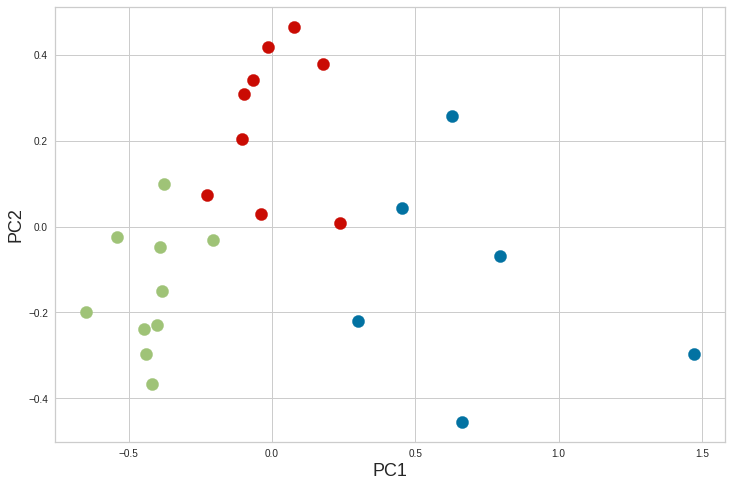

In [ ]:
import matplotlib.pyplot as plt

# # matplotlib 한글지원
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
# ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

In [ ]:
# !pip install pyclustering
from pyclustering.cluster import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch

kmedoids_ins = kmedoids.kmedoids(PCA_jachigu_df.values,initial_index_medoids=[0,6]) # initial_index는 df행 중 대푯값 행 지정
kmedoids_ins.process()
clusters = kmedoids_ins.get_clusters()
score = silhouette(PCA_jachigu_df.values, clusters).process().get_score()
print("평균 실루엣값 : ",sum(score)/len(score), score)
# medoids = kmeans_plusplus_initializer(PCA_jachigu_df, 4).initialize(return_index=True)
# kmedoids_instance = kmedoids(PCA_jachigu_df, medoids)
# clusters = kmedoids_instance.process().get_clusters()
print('###########################################')
print('[K-대푯값 군집 분석 결과]')

print(clusters)


평균 실루엣값 :  0.7003748960767292 [0.019450994969185825, 0.681374365286177, 0.40464102724645395, 0.7939693714955416, 0.6952938001283807, 0.5363980323016748, 0.5631218444862897, 0.7905009637807601, 0.756362073317581, 0.8235405773540218, 0.8925410010724069, 0.81163357045013, 0.8182384103448623, 0.8681444021470286, 0.8859333426435646, 0.8852609591581709, 0.8336248379541279, 0.19967979178723386, 0.7876592868574979, 0.4251695093641086, 0.8739172876451027, 0.8384504352617765, 0.8645437546389768, 0.7803499547869488, 0.6795728074402276]
###########################################
[K-대푯값 군집 분석 결과]
[[0, 1, 18, 21, 22, 23], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 24]]


In [ ]:
for i in range(len(clusters)):
  PCA_jachigu_df.loc[PCA_jachigu_df.reset_index().index.isin(clusters[i]), 'cluster'] = i

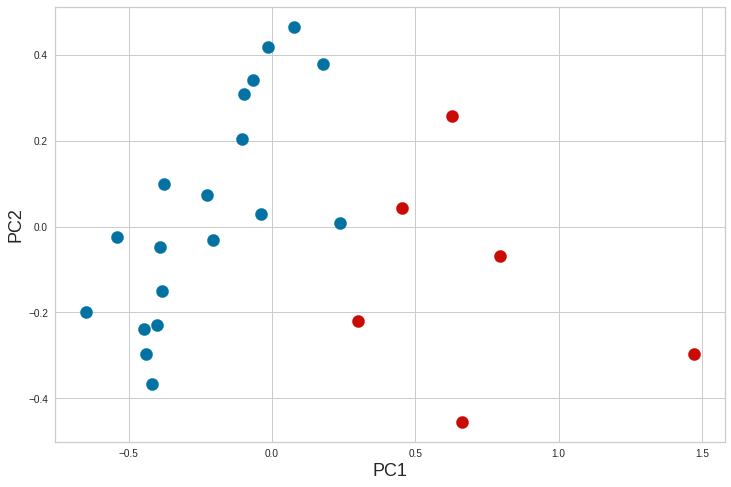

In [ ]:
import matplotlib.pyplot as plt

# # matplotlib 한글지원
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
# ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
# ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

In [ ]:
# !pip install pyclustering
from pyclustering.cluster import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch

kmedoids_ins = kmedoids.kmedoids(PCA_jachigu_df.values,initial_index_medoids=[0,5,10,20]) # initial_index는 df행 중 대푯값 행 지정
kmedoids_ins.process()
clusters = kmedoids_ins.get_clusters()
score = silhouette(PCA_jachigu_df.values, clusters).process().get_score()
print("평균 실루엣값 : ",sum(score)/len(score), score)
# medoids = kmeans_plusplus_initializer(PCA_jachigu_df, 4).initialize(return_index=True)
# kmedoids_instance = kmedoids(PCA_jachigu_df, medoids)
# clusters = kmedoids_instance.process().get_clusters()
print('###########################################')
print('[K-대푯값 군집 분석 결과]')

print(clusters)


평균 실루엣값 :  0.9300203135869309 [0.8646556340275237, 0.8650294061053566, 0.9349975000732818, 0.8846896800868902, 0.8712882933971993, 0.9338521775503391, 0.9170122034536682, 0.9687317379688745, 0.964173060883791, 0.917489166131853, 0.9693211790232703, 0.9187004807380684, 0.956717408147527, 0.6681789457499423, 0.8125626363272448, 0.9699297298881879, 0.9829369675431116, 0.9775561253656924, 0.9831031773399055, 0.9863887161284774, 0.9874594930337103, 0.9645527770058419, 0.9875434365588368, 0.9892510254453469, 0.9743868816993329]
###########################################
[K-대푯값 군집 분석 결과]
[[0, 13, 18, 21, 23], [2, 3, 4, 5, 10, 14, 15, 24], [1, 22], [6, 7, 8, 9, 11, 12, 16, 17, 19, 20]]


In [ ]:
for i in range(len(clusters)):
  PCA_jachigu_df.loc[PCA_jachigu_df.reset_index().index.isin(clusters[i]), 'cluster'] = i

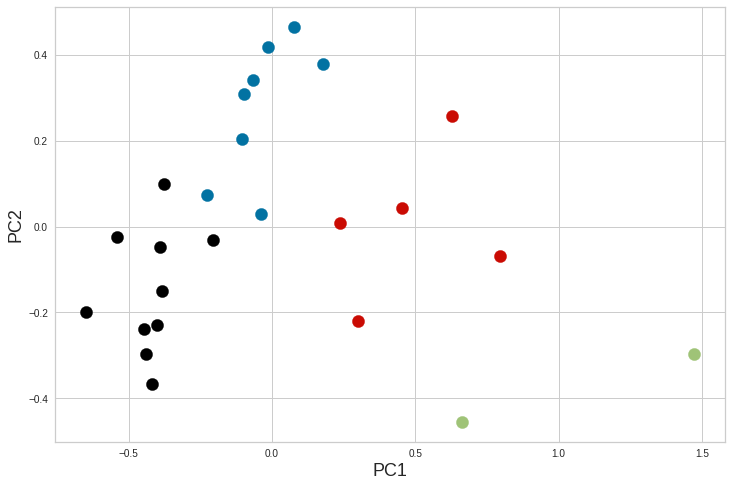

In [ ]:
import matplotlib.pyplot as plt

# # matplotlib 한글지원
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )

해당 군집이 가장 적절하게 수행되었다고 볼수 있다. (PC1이 높고, PC2는 낮은 군집 형성)

가장 적합한 1그룹(연두색)은 중구, 강남구이다. 1단계 실증에서 버티포트를 설치하였을 거라는 가정하에 다음으로 적합한 그룹인 2그룹으로 자치구 후보를 추출하였다.

2그룹 : 마포구, 영등포구, 서초구, 종로구, 송파구

In [ ]:
PCA_jachigu_df

,PC1,PC2,cluster
자치구,,,
종로구,0.298320,-0.219585,0.0
중구,0.661299,-0.454939,2.0
용산구,0.075954,0.464922,1.0
성동구,-0.038058,0.028805,1.0
광진구,-0.067805,0.340226,1.0
동대문구,-0.103461,0.203521,1.0
중랑구,-0.376160,0.098892,3.0
성북구,-0.438904,-0.297327,3.0
강북구,-0.650491,-0.198875,3.0


In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gmm3 = GaussianMixture(n_components=3, random_state=0)
gmm3.fit(PCA_jachigu_df)
gmm3_cluster_labels = gmm3.predict(PCA_jachigu_df)

# target, gmm_cluster 비교
PCA_jachigu_df["cluster"] = gmm3_cluster_labels

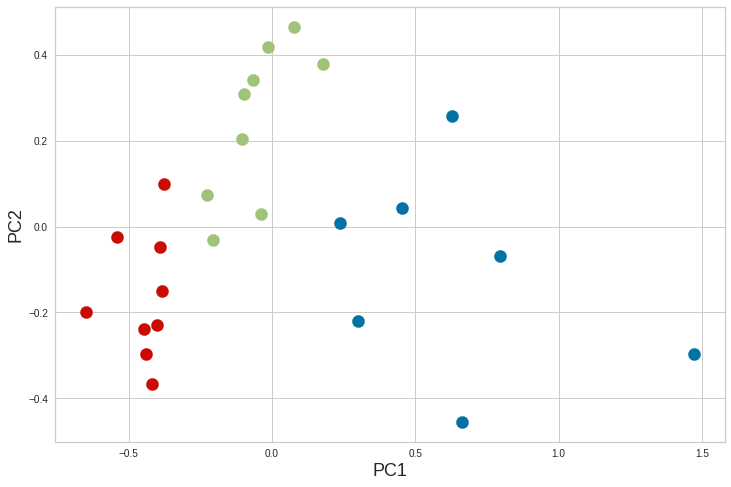

In [ ]:
import matplotlib.pyplot as plt

# # matplotlib 한글지원
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 


TP_MDS_df = PCA_jachigu_df.copy() 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
# plt.zlabel('PC3', fontsize=18)

ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==0,  'PC2'],  s = 150, color = 'r' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==1,  'PC2'],  s = 150, color = 'b' )
ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==2,  'PC2'],  s = 150, color = 'g' )
# ax.scatter(TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC1'], TP_MDS_df.loc[TP_MDS_df['cluster']==3,  'PC2'],  s = 150, color = 'black' )

In [ ]:
PCA_jachigu_df = pd.DataFrame(pc_transform[:, 0:2], columns=['PC1', 'PC2'], index = jachigu_scaled_df.index) 